In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

# Introducción




# Abre el archivo de datos y estudia la información general **(Parte 1)**

In [2]:
url = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/sprint_6/games.csv'

df = pd.read_csv(url)

In [3]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15145,Zero no Tsukaima: Shou-akuma to Harukaze no Co...,PS2,2007.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9551,LEGO Racers 2,PS2,2001.0,Racing,0.06,0.05,0.00,0.02,58.0,tbd,E
5313,Chicken Shoot,Wii,2007.0,Action,0.32,0.00,0.00,0.02,27.0,4.8,E10+
12565,Marvel Super Heroes,SAT,1997.0,Fighting,0.00,0.00,0.06,0.00,NaN,NaN,NaN
9036,G.I. Joe: The Rise of Cobra,PSP,2009.0,Action,0.11,0.02,0.00,0.02,NaN,tbd,T
7024,Wipeout 2,3DS,2011.0,Misc,0.22,0.00,0.00,0.01,NaN,tbd,E
11557,Sengoku Musou 3: Moushouden,Wii,2011.0,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
11142,Rock Band Country Track Pack 2,Wii,2011.0,Misc,0.08,0.00,0.00,0.01,NaN,tbd,E10+
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.00,0.10,83.0,NaN,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Descripción del Dataset**

Basado en la información general obtenida en la **Parte 1**, el dataset contiene información sobre videojuegos. Las columnas presentes son:

- `Name`: Nombre del juego (Object)
- `Platform`: Plataforma del juego (Object)
- `Year_of_Release`: Año de lanzamiento (Float64)
- `Genre`: Género del juego (Object)
- `NA_sales`: Ventas en Norteamérica (Float64)
- `EU_sales`: Ventas en Europa (Float64)
- `JP_sales`: Ventas en Japón (Float64)
- `Other_sales`: Ventas en otras regiones (Float64)
- `Critic_Score`: Puntuación de los críticos (Float64)
- `User_Score`: Puntuación de los usuarios (Object)
- `Rating`: Clasificación ESRB (Object)

Se han identificado valores nulos en las columnas `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, y `Rating`. La columna `User_Score` tiene el tipo de dato 'Object' y contiene el valor 'tbd', lo que sugiere que deberá ser convertida a tipo numérico y manejar este valor especial.

**Sugerencias para la Preparación de Datos**

Para preparar los datos adecuadamente, se sugieren los siguientes pasos:

1.  **Manejar valores nulos**:
    *   Identificar y decidir cómo manejar los valores nulos en las columnas. Para `Year_of_Release`, se podría considerar imputar con la mediana o moda, o incluso eliminar filas si el número de nulos es pequeño. Para las columnas de puntuación (`Critic_Score`, `User_Score`) y `Rating`, que tienen un número considerable de valores nulos, se deberá evaluar si es mejor imputar (considerando la distribución) o si es aceptable mantener los nulos para ciertos análisis, o incluso eliminar la columna si la cantidad de nulos es muy alta y no hay una estrategia de imputación clara. Las filas con valores nulos en `Name` y `Genre` probablemente puedan eliminarse dado su bajo recuento.
2.  **Convertir tipos de datos**:
    *   Convertir la columna `Year_of_Release` a tipo entero (`int`) ya que representa años.
    *   Convertir la columna `User_Score` a tipo numérico (`float`). Es necesario manejar el valor 'tbd' antes de la conversión, posiblemente reemplazándolo por `NaN`.
3.  **Manejar duplicados**:
    *   Verificar si existen filas duplicadas en el dataset y eliminarlas si las hay para asegurar la unicidad de las observaciones.
4.  **Calcular ventas totales**:
    *   Crear una nueva columna que represente las ventas totales sumando las ventas de todas las regiones (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`). Esta columna será útil para los análisis posteriores.

# Prepara los datos **(Parte 2)**

## Reemplaza los nombres de las columnas

In [5]:
def cols_names_lower(df):
  df.columns = [col.lower() for col in df.columns]
  return df

In [6]:
df = cols_names_lower(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Para facilitar el manejo y la consistencia en el código, se han convertido todos los nombres de las columnas a minúsculas. Esto ayuda a evitar errores de escritura y hace que el código sea más legible al no tener que recordar la capitalización exacta de cada columna.

## Tratar los valores nulos

### ['name']

In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Se eliminaron las filas con valores nulos en la columna `name`, ya que solo eran dos y no proporcionaban información útil para el análisis.

### [year_of_release]

In [9]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df['year_of_release'].describe()


,year_of_release
count,16444.000000
mean,2006.486256
std,5.875525
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


In [11]:
df['year_of_release'].mode()

,year_of_release
0,2008.0


In [12]:
def mode_platform(df, platform):
  return df[df['platform'] == platform]['year_of_release'].mode()[0]

In [13]:
mode_platform(df, 'X360')

np.float64(2011.0)

In [14]:
for index, row in df[df['year_of_release'].isna()].iterrows():
    platform = row['platform']
    mode_year = mode_platform(df, platform)
    df.loc[index, 'year_of_release'] = mode_year

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [15]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14007,Caesar IV,PC,2006.0,Strategy,0.00,0.03,0.00,0.01,74.0,7.6,E10+
14876,NatGeo Challenge! Wild Life,X360,2010.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN
4652,Star Wars Starfighter: Special Edition,XB,2001.0,Simulation,0.30,0.10,0.00,0.02,76.0,tbd,T
9328,Bratz,GBA,2002.0,Platform,0.10,0.04,0.00,0.00,NaN,tbd,E
1697,Kobe Bryant in NBA Courtside,N64,1998.0,Sports,1.02,0.13,0.04,0.01,NaN,NaN,NaN


Los valores nulos en la columna `year_of_release` fueron imputados utilizando la moda del año de lanzamiento para cada plataforma. Esto se hizo para mantener la mayor cantidad de datos posible y basar la imputación en la distribución de años dentro de cada plataforma.

### [critic_score]

In [16]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
df['critic_score'].describe()

,critic_score
count,8137.000000
mean,68.967679
std,13.938165
min,13.000000
25%,60.000000
50%,71.000000
75%,79.000000
max,98.000000


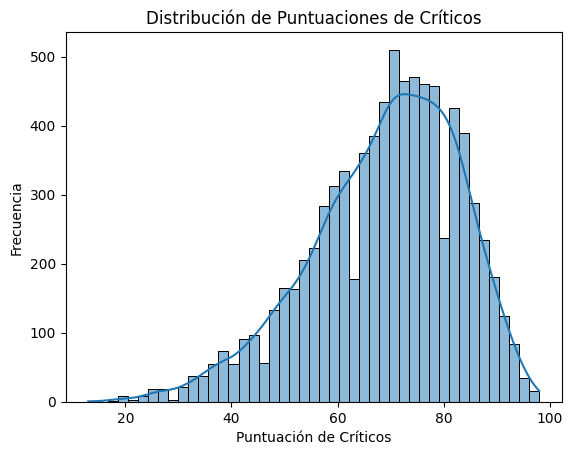

In [18]:
sns.histplot(
    df['critic_score'],
    kde=True,)
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Críticos')
plt.show()

In [19]:
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


/tmp/ipython-input-3541487147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critic_score'].fillna(df['critic_score'].median(), inplace=True)


Los valores nulos en la columna `critic_score` fueron imputados con la mediana. Se decidió utilizar la mediana ya que la distribución de las puntuaciones de los críticos parece ligeramente sesgada, y la mediana es menos sensible a los valores atípicos que la media.

### ['user_score']

In [20]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN


In [21]:
df['user_score'].describe()

,user_score
count,10014
unique,96
top,tbd
freq,2424


"TBD" es la abreviatura de "To Be Determined" (Por determinar), y se usa para indicar que algo aún no está definido pero se definirá en el futuro.
- TBD (To Be Determined): Significa que el resultado aún no está definido y se anunciará más adelante.
- Puntuación: En este contexto, se refiere a una calificación o un valor asignado por los usuarios, como en una página de reseñas.

In [22]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [23]:
df['user_score'] = df['user_score'].astype(float)

In [24]:
df['user_score'].describe()

,user_score
count,7590.000000
mean,7.125046
std,1.500006
min,0.000000
25%,6.400000
50%,7.500000
75%,8.200000
max,9.700000


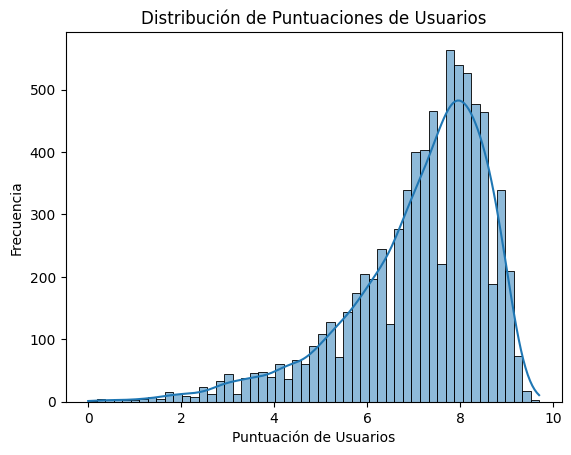

In [25]:
sns.histplot(
    df['user_score'],
    kde=True,)
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Usuarios')
plt.show()

In [26]:
df['user_score'] = df['user_score'].fillna(df['user_score'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


Los valores 'tbd' en la columna `user_score` fueron reemplazados por `NaN` y luego la columna fue convertida a tipo numérico. Los valores nulos resultantes fueron imputados con la mediana. Finalmente, se visualizó la distribución de las puntuaciones de los usuarios utilizando un histograma para entender mejor su comportamiento.

### ['rating']

In [27]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


In [28]:
def impute_rating_with_genre_mode(row):
    if pd.isna(row['rating']):
        genre = row['genre']

        mode_rating = df[df['genre'] == genre]['rating'].mode()
        if not mode_rating.empty:
            return mode_rating[0]
        else:
            return np.nan
    return row['rating']

In [29]:
df['rating'] = df.apply(impute_rating_with_genre_mode, axis=1)

In [30]:
print("Número de valores nulos en la columna 'rating' después de la imputación por moda de género:")
print(df['rating'].isna().sum())

df.info()

Número de valores nulos en la columna 'rating' después de la imputación por moda de género:
0
<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


El código define una función llamada `impute_rating_with_genre_mode` que toma una fila del DataFrame como entrada. Dentro de esta función:

1. Primero, verifica si el valor en la columna `rating` de la fila actual es nulo (`pd.isna(row['rating'])`).
2. Si es nulo, accede al `genre` de esa misma fila.
3. Luego, filtra el DataFrame original (**`df`**) para seleccionar solo las filas que pertenecen a ese mismo `genre`.
4. Calcula la moda (`mode()`) de la columna `rating` para ese subconjunto de datos (juegos del mismo género). La moda es el valor que aparece con más frecuencia.
5. Verifica si se encontró una moda (`if not mode_rating.empty`). Esto es importante porque podría haber géneros sin clasificaciones no nulas, en cuyo caso la moda estaría vacía.
Si se encuentra una moda, devuelve el primer valor de la moda (`mode_rating[0]`). Se toma el primero porque a veces puede haber más de un valor con la misma frecuencia máxima.
6. Si no se encuentra una moda para ese género (la lista `mode_rating` está vacía), devuelve np.nan para indicar que no se pudo imputar el valor.
7. Si el valor original en `rating` no era nulo, la función simplemente devuelve ese valor original (`return row['rating']`).

Después de definir la función, el código aplica esta función a cada fila del DataFrame df utilizando df.apply(impute_rating_with_genre_mode, axis=1). El argumento axis=1 indica que la función debe aplicarse a través de las filas.

Finalmente, el código imprime el número de valores nulos restantes en la columna rating para confirmar que la imputación se realizó correctamente y muestra la información actualizada del DataFrame (df.info()) para ver el recuento de valores no nulos en todas las columnas.

### Explicación

En la sección "Tratar los valores nulos", se llevaron a cabo las siguientes acciones para manejar los valores faltantes en el dataset:

*   **`name`**: Se eliminaron las dos filas con valores nulos en esta columna, ya que representaban un porcentaje muy pequeño del dataset y no era posible imputar los nombres de los juegos de manera fiable.
*   **`year_of_release`**: Los valores nulos en esta columna se imputaron con la moda del año de lanzamiento para cada plataforma. Esta estrategia se eligió para mantener la mayor cantidad de datos posible y basar la imputación en el comportamiento típico de lanzamiento de juegos por plataforma.
*   **`critic_score`**: Los valores nulos se imputaron con la mediana de las puntuaciones de los críticos. La mediana fue seleccionada debido a que la distribución de las puntuaciones parecía ligeramente sesgada, siendo menos sensible a valores atípicos que la media.
*   **`user_score`**: Los valores 'tbd' se reemplazaron por `NaN` y luego la columna se convirtió a tipo numérico. Los valores nulos resultantes (incluyendo los 'tbd' originales y otros nulos) se imputaron con la mediana de las puntuaciones de los usuarios. Se utilizó la mediana por razones similares a las de `critic_score` y porque 'tbd' no representa un valor numérico real.
*   **`rating`**:  Los valores de clasificación faltantes basándose en la clasificación más común para los juegos del mismo género, ayudando a completar los datos para análisis posteriores.

## Convierte los datos en los tipos necesarios.


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


### year_of_release

In [32]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


La columna `year_of_release` fue convertida a tipo entero (`int`) ya que representa años, y los años son valores discretos y no requieren precisión decimal. Esta conversión asegura que el tipo de dato refleje correctamente la naturaleza de la información.

## Ventas totales

In [34]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


In [36]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12650,Syndicate,PC,1992,Strategy,0.00,0.05,0.00,0.01,71.0,7.5,T,0.06
13448,Boing! Docomodake DS,DS,2007,Puzzle,0.04,0.00,0.00,0.00,71.0,7.5,E,0.04
10388,Dragon Ball Z: Battle of Z,PSV,2014,Fighting,0.00,0.04,0.06,0.01,66.0,7.5,T,0.11
7801,Marvel Super Hero Squad: Comic Combat,PS3,2011,Action,0.11,0.05,0.00,0.03,71.0,7.5,E10+,0.19
15897,Elven Legacy Collection,PC,2010,Strategy,0.00,0.01,0.00,0.00,71.0,7.5,T,0.01
1740,LEGO Star Wars III: The Clone Wars,PS3,2011,Action,0.52,0.46,0.00,0.19,76.0,7.3,E10+,1.17
14475,MotoGP 15,XOne,2015,Racing,0.00,0.03,0.00,0.00,65.0,7.5,E,0.03
11053,Ochaken no Heya DS 2,DS,2007,Simulation,0.00,0.00,0.09,0.00,71.0,7.5,E,0.09
13547,My Body Coach,Wii,2009,Sports,0.00,0.04,0.00,0.00,71.0,7.5,E,0.04
9033,Second Sight,PS2,2004,Adventure,0.07,0.05,0.00,0.02,76.0,8.0,T,0.14


Se creó una nueva columna llamada `total_sales` que representa la suma de las ventas en todas las regiones (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`). Esta columna es fundamental para el análisis posterior, ya que permite evaluar el rendimiento global de cada juego independientemente de la región. La suma de las ventas individuales en cada región proporciona una métrica consolidada para entender el éxito comercial de los videojuegos a nivel mundial.

# Analiza los datos **(Parte 3)**

## ¿Son significativos los datos de cada período?

In [37]:
games_per_year = df['year_of_release'].value_counts().sort_index()

print("Número de juegos lanzados por año:")
print(games_per_year)

Número de juegos lanzados por año:
year_of_release
1980       9
1981      63
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     386
1999     341
2000     351
2001     482
2002     888
2003     796
2004     762
2005     939
2006    1022
2007    1197
2008    1457
2009    1460
2010    1255
2011    1216
2012     653
2013     544
2014     581
2015     607
2016     502
Name: count, dtype: int64


## ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

### Identificar las plataformas principales

Calcular las ventas totales por plataforma y seleccionar las que tienen las mayores ventas.


In [38]:
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Plataformas con mayores ventas totales:")
print(platform_total_sales.head(10))

Plataformas con mayores ventas totales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


### Analizar la distribución anual de ventas para plataformas principales

Para cada una de las plataformas seleccionadas, agrupar por año de lanzamiento y calcular las ventas totales para cada año.


In [39]:
top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

df_top_platforms = df[df['platform'].isin(top_10_platforms)]

platform_annual_sales = df_top_platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [40]:
platform_annual_sales.head()

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


### Visualizar las ventas anuales de las plataformas principales

Crear gráficos de líneas o barras para visualizar cómo han cambiado las ventas de las plataformas principales a lo largo del tiempo.


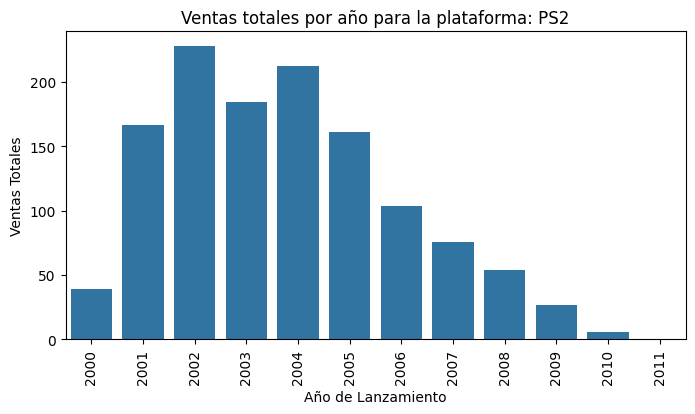

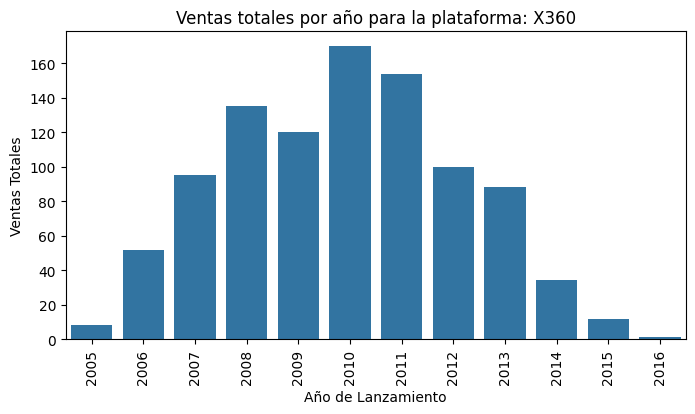

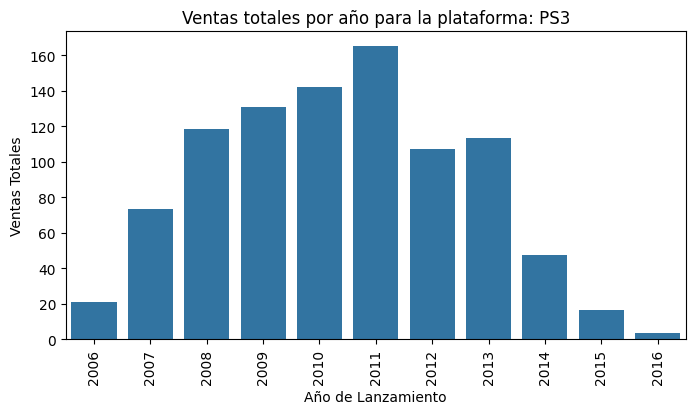

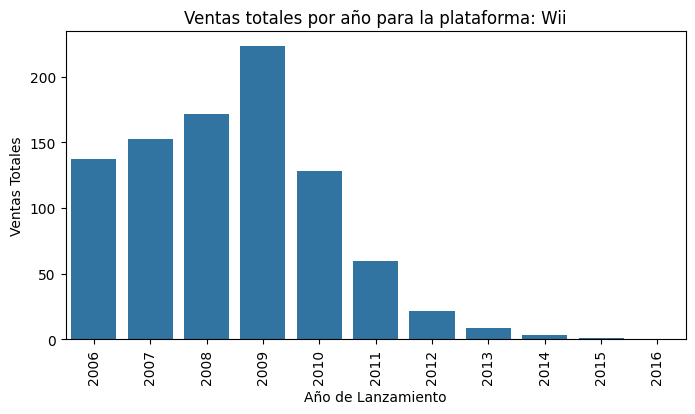

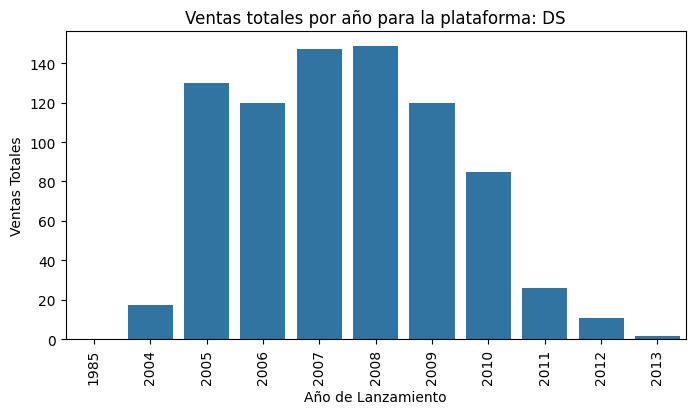

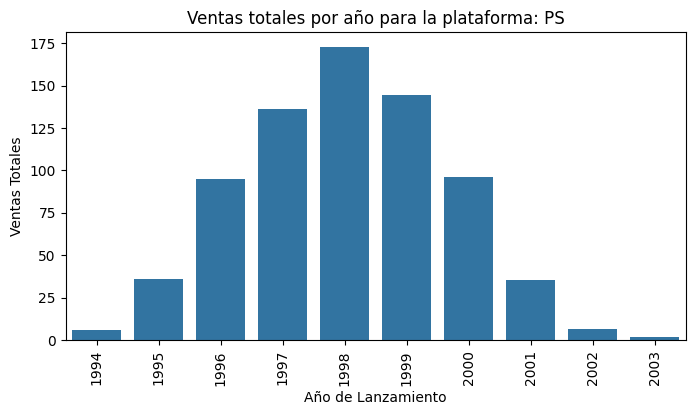

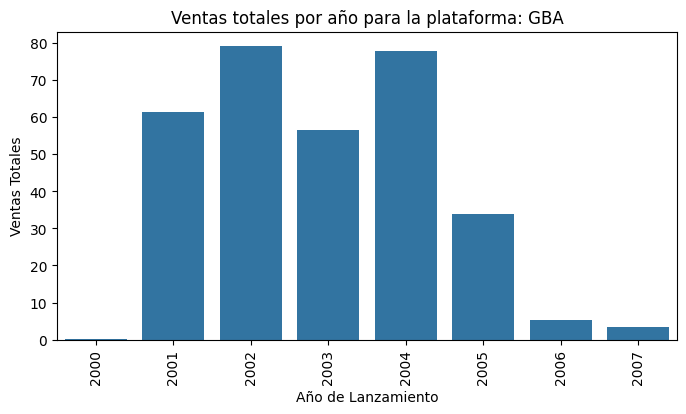

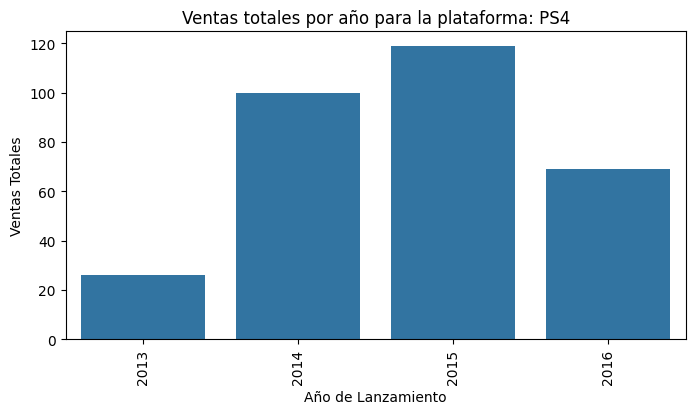

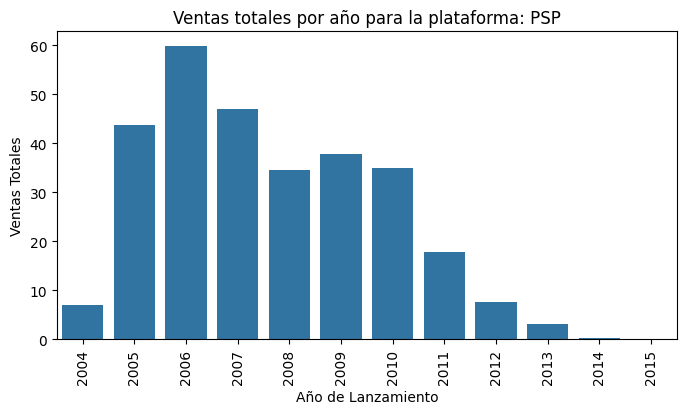

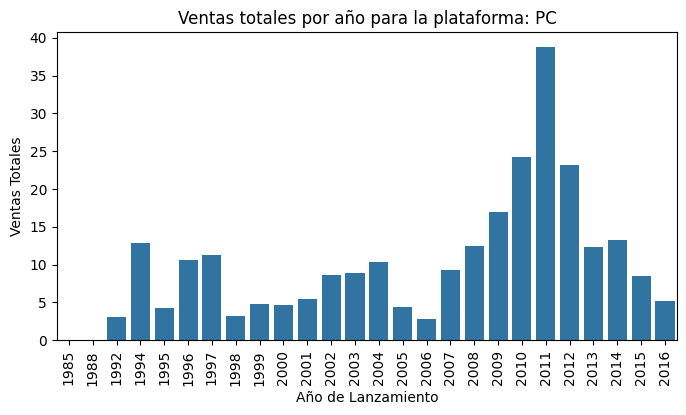

In [41]:
top_10_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

for platform in top_10_platforms:
    platform_data = platform_annual_sales[platform_annual_sales['platform'] == platform]
    plt.figure(figsize=(8, 4))
    sns.barplot(x='year_of_release',
                y='total_sales',
                data=platform_data,)
    plt.title(f'Ventas totales por año para la plataforma: {platform}')
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=90)
    plt.show()

### Estimar la vida útil de las plataformas

Basado en los datos, estimar el tiempo que generalmente tardan en aparecer nuevas plataformas y en desaparecer las antiguas.


In [42]:
platform_lifespan = platform_annual_sales.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

platform_lifespan.head()

,platform,min,max,lifespan
0,DS,1985,2013,28
1,GBA,2000,2007,7
2,PC,1985,2016,31
3,PS,1994,2003,9
4,PS2,2000,2011,11


In [43]:
lifespan_stats = platform_lifespan['lifespan'].describe()

print("Vida útil estimada por plataforma:")
print(platform_lifespan[['platform', 'lifespan']])


print("\nEstadísticas descriptivas de la vida útil estimada:")
print(lifespan_stats)

Vida útil estimada por plataforma:
  platform  lifespan
0       DS        28
1      GBA         7
2       PC        31
3       PS         9
4      PS2        11
5      PS3        10
6      PS4         3
7      PSP        11
8      Wii        10
9     X360        11

Estadísticas descriptivas de la vida útil estimada:
count    10.000000
mean     13.100000
std       9.011721
min       3.000000
25%       9.250000
50%      10.500000
75%      11.000000
max      31.000000
Name: lifespan, dtype: float64


### Resumir los hallazgos



Observaciones sobre las ventas por plataforma y la vida útil:

Análisis de los gráficos de ventas anuales por plataforma:
- Se observa que la mayoría de las plataformas tienen un ciclo de vida con un aumento inicial en las ventas, un pico y luego un descenso gradual.
- El pico de ventas varía significativamente entre plataformas, tanto en el año en que ocurre como en la magnitud de las ventas.
- Algunas plataformas, como la PS2 y la DS, tuvieron un período de ventas pico prolongado, mientras que otras tuvieron picos más agudos y descensos más rápidos.
- La velocidad de crecimiento y declive también difiere; algunas plataformas ganaron popularidad rápidamente y la perdieron de manera similar, mientras que otras tuvieron un crecimiento y declive más lentos.
- La plataforma de PC muestra un patrón de ventas más consistente a lo largo de muchos años en comparación con las consolas, que tienen ciclos de vida más definidos.

Hallazgos sobre la vida útil estimada de las plataformas:
- La vida útil promedio de las plataformas es de aproximadamente 13.1 años.
- La vida útil mínima observada es de 3 años y la máxima es de 31 años.
- Plataformas como PC y DS destacan por tener una vida útil considerablemente más larga.
- Otras plataformas, como la PS4 en este conjunto de datos (que solo llega hasta 2016), muestran una vida útil más corta, aunque esto podría deberse a que aún estaban activas al final del período de los datos.

Resumen general:
El análisis de las ventas por plataforma y su vida útil revela que la industria de los videojuegos está marcada por ciclos de plataforma.

Cada plataforma tiene su propio patrón de ventas a lo largo del tiempo, influenciado por factores como la innovación tecnológica, la competencia y la adopción por parte de los consumidores.

Mientras que algunas plataformas tienen ciclos de vida relativamente cortos y picos de ventas intensos, otras, como la PC, demuestran una longevidad notable con ventas más estables a lo largo de décadas.

La vida útil de una plataforma puede variar considerablemente, desde unos pocos años hasta más de dos décadas, lo que refleja la diversidad y la evolución constante del mercado de los videojuegos.


## ¿Los datos deberían permitirte construir un modelo para 2017?

Para construir un modelo que proyecte o analice el año 2017, debes tomar datos del período 2010–2016.
Este rango:

- Representa las tendencias recientes y relevantes del mercado antes de 2017.
- Incluye suficientes observaciones por año y plataforma.
- Permite capturar el comportamiento contemporáneo de las consolas y juegos aún activos en 2017.

## Separar los datos en el periodo deseado

In [44]:
period_data = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

In [45]:
period_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5358 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5358 non-null   object 
 1   platform         5358 non-null   object 
 2   year_of_release  5358 non-null   int64  
 3   genre            5358 non-null   object 
 4   na_sales         5358 non-null   float64
 5   eu_sales         5358 non-null   float64
 6   jp_sales         5358 non-null   float64
 7   other_sales      5358 non-null   float64
 8   critic_score     5358 non-null   float64
 9   user_score       5358 non-null   float64
 10  rating           5358 non-null   object 
 11  total_sales      5358 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 544.2+ KB


In [46]:
period_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13515,Monster High: New Ghoul in School,3DS,2015,Action,0.00,0.04,0.00,0.00,71.0,7.5,E,0.04
785,NBA 2K14,PS3,2013,Sports,1.44,0.31,0.04,0.32,84.0,4.9,E,2.11
14046,Nobunaga's Ambition: Sphere of Influence - Sen...,PS3,2016,Misc,0.00,0.00,0.04,0.00,71.0,7.5,E,0.04
4113,Bakugan Battle Brawlers: Defenders of the Core,DS,2010,Action,0.41,0.02,0.02,0.03,71.0,7.5,E10+,0.48
14751,The IdolM@ster: Gravure For You! Vol. 6,PS3,2012,Action,0.00,0.00,0.03,0.00,71.0,7.5,T,0.03
2486,Tiger Woods PGA Tour 11,PS3,2010,Sports,0.37,0.33,0.00,0.13,78.0,6.7,E,0.83
11172,WRC 5: FIA World Rally Championship,PS3,2015,Sports,0.02,0.05,0.00,0.01,71.0,7.5,E,0.08
14401,Trials Fusion,PC,2014,Racing,0.00,0.03,0.00,0.00,80.0,6.8,E10+,0.03
16375,Starry ? Sky: After Autumn,PSP,2011,Misc,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
1420,Need for Speed: The Run,X360,2011,Action,0.63,0.57,0.00,0.15,68.0,6.0,T,1.35


## Elige varias plataformas potencialmente rentables.

### ¿Qué plataformas son líderes en ventas?

In [47]:
platform_sales_in_period = period_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma (2010-2016):")
print(platform_sales_in_period)

Ventas totales por plataforma (2010-2016):
platform
PS3     596.05
X360    560.59
PS4     314.14
3DS     259.00
Wii     222.97
XOne    159.32
PC      125.72
DS      123.75
WiiU     82.19
PSP      64.05
PSV      54.07
PS2       6.09
Name: total_sales, dtype: float64


### ¿Cuáles crecen y cuáles se reducen?

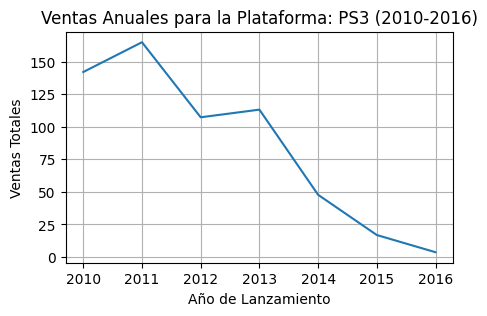

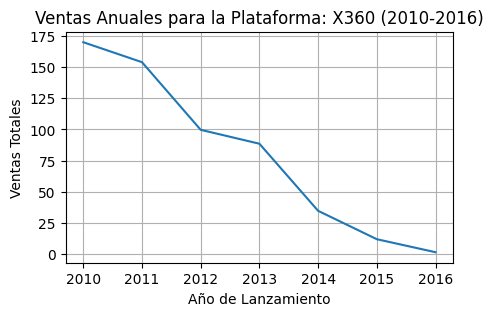

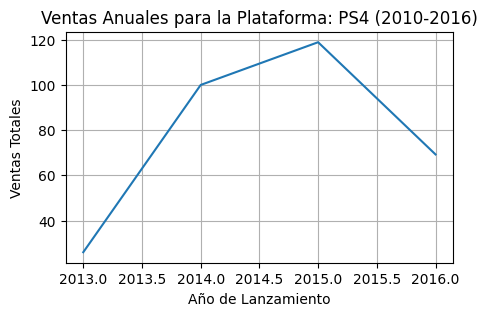

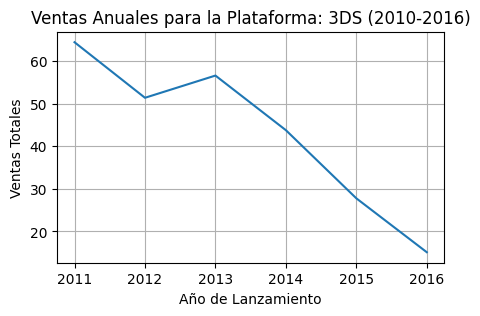

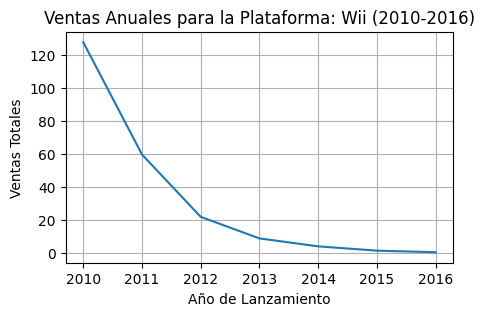

In [48]:
top_platforms_period = platform_sales_in_period.head(5).index.tolist()

platform_annual_sales_period = period_data[period_data['platform'].isin(top_platforms_period)
].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Visualize the annual sales for the top platforms
for platform in top_platforms_period:
    platform_data_period = platform_annual_sales_period[platform_annual_sales_period['platform'] == platform]
    plt.figure(figsize=(5, 3))
    sns.lineplot(x='year_of_release', y='total_sales', data=platform_data_period)
    plt.title(f'Ventas Anuales para la Plataforma: {platform} (2010-2016)')
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel('Ventas Totales')
    plt.grid(True)
    plt.show()

### Plataformas potencialmente rentables

**Plataformas potencialmente rentables para 2017:**

Basado en las ventas totales en el período 2010-2016 y el análisis de las tendencias de ventas anuales para las plataformas líderes:

*   **PS4 y XOne:** Estas plataformas son las más recientes entre las líderes y muestran un crecimiento significativo en ventas dentro del período, lo que sugiere que es probable que continúen siendo rentables en 2017.
*   **3DS:** Aunque su crecimiento se desaceleró hacia el final del período, aún mantenía un volumen de ventas considerable, lo que la convierte en una plataforma a considerar, especialmente en el mercado japonés donde Nintendo suele tener una fuerte presencia.
*   **PC:** Si bien no tiene los picos de ventas de las consolas, la plataforma de PC muestra una base de ventas más estable a lo largo del tiempo y una vida útil muy larga, lo que indica una rentabilidad sostenida.

Aunque PS3 y X360 tuvieron las mayores ventas totales en el período 2010-2016, sus gráficos de ventas anuales muestran un claro descenso hacia el final del período, lo que indica que su rentabilidad probablemente esté disminuyendo en 2017. La Wii también muestra una clara tendencia a la baja en sus ventas.

Por lo tanto, las plataformas más prometedoras para centrarse en 2017, basándonos en los datos disponibles, son **PS4, XOne, 3DS y PC**.

## Boxplot

/tmp/ipython-input-815807294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='platform', x='total_sales', data=period_data, palette='Paired')


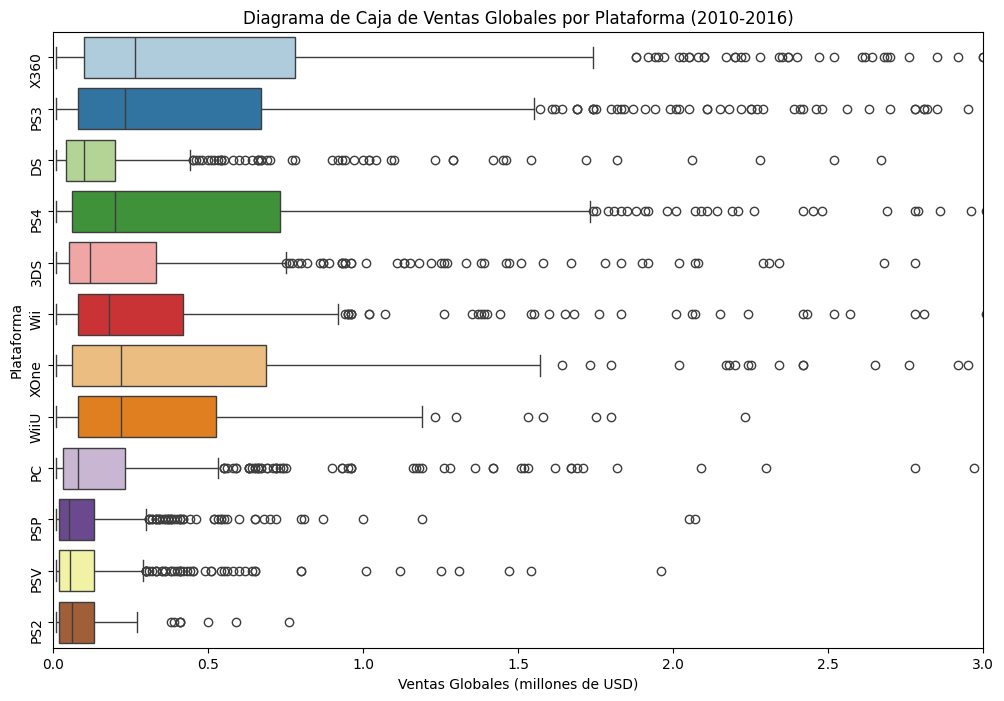

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='platform', x='total_sales', data=period_data, palette='Paired')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2010-2016)')
plt.ylabel('Plataforma')
plt.xlabel('Ventas Globales (millones de USD)')
plt.yticks(rotation=90)
plt.xlim(0, 3)
plt.show()

**Análisis del Diagrama de Caja de Ventas Globales por Plataforma (2010-2016):**

A partir de este gráfico, se puede observar lo siguiente:

- Diferencias generales en las ventas:
Las plataformas PS3 y X360 muestran una mayor amplitud en sus cajas y varios valores atípicos, lo que refleja juegos con ventas muy altas. En contraste, PSV y PSP tienen cajas compactas, indicando ventas más bajas y homogéneas.

- Ventas promedio (mediana):
La venta típica de un juego varía entre plataformas. PS3, X360, PS4 y XOne presentan medianas más altas, mientras que DS, PSP y PSV muestran menores valores medianos.

- Dispersión de las ventas:
Las plataformas con mayor volumen total de ventas (PS3, X360) presentan mayor variabilidad interna, evidenciada por cajas más altas en el gráfico.

- Valores atípicos:
Los puntos fuera de los bigotes representan juegos con ventas excepcionales o muy bajas. La presencia y cantidad de estos valores difiere por plataforma, destacando el papel de los títulos “éxito” o “hit” en el desempeño general de ventas.

---

> En resumen, el diagrama de caja confirma que el rendimiento de ventas varía enormemente entre plataformas, con algunas plataformas teniendo una base de juegos con ventas consistentemente más altas y otras dependiendo más de unos pocos títulos exitosos para impulsar sus ventas totales.

## Reseñas vs Ventas

Analiza cómo las reseñas de usuarios y profesionales afectan las ventas de las plataformas X360 y PS4 utilizando los datos del período 2010-2016. Crea gráficos de dispersión y calcula la correlación entre las reseñas y las ventas para cada plataforma. Saca conclusiones sobre la relación entre las reseñas y las ventas.

### Filtrar los datos

Crear DataFrames separados para las plataformas X360 y PS4 utilizando los datos del período 2010-2016 (`period_data`).


In [50]:
x360_data = period_data[period_data['platform'] == 'X360']
ps4_data = period_data[period_data['platform'] == 'PS4']

print("Primeras filas del DataFrame x360_data:")
display(x360_data.head())

print("\nPrimeras filas del DataFrame ps4_data:")
display(ps4_data.head())

Primeras filas del DataFrame x360_data:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68



Primeras filas del DataFrame ps4_data:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71.0,7.5,M,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


### Crear gráficos de dispersión

Generar gráficos de dispersión para visualizar la relación entre `critic_score` y `total_sales`, y entre `user_score` y `total_sales` para cada una de las plataformas seleccionadas.


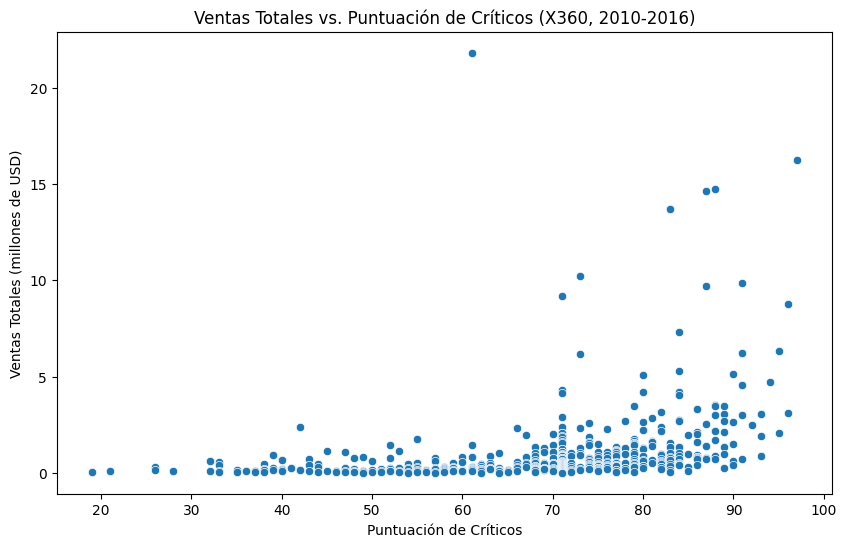

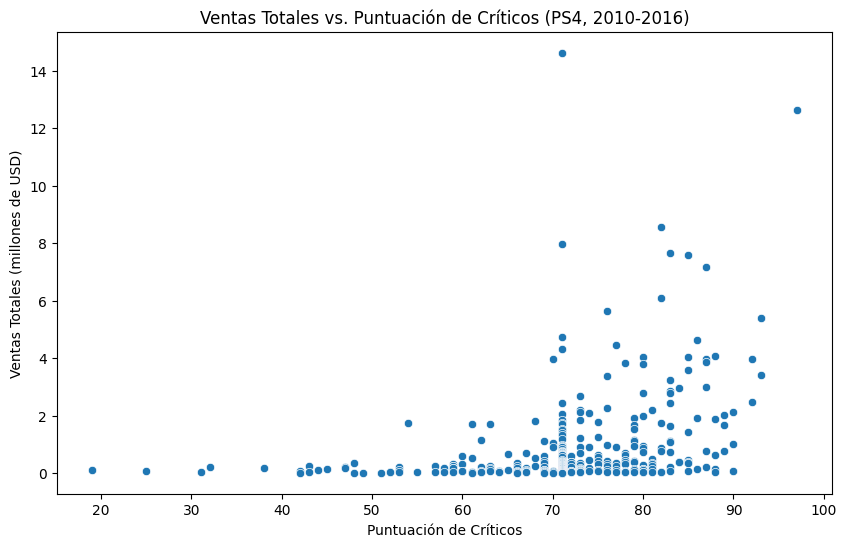

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360_data)
plt.title('Ventas Totales vs. Puntuación de Críticos (X360, 2010-2016)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Ventas Totales vs. Puntuación de Críticos (PS4, 2010-2016)')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

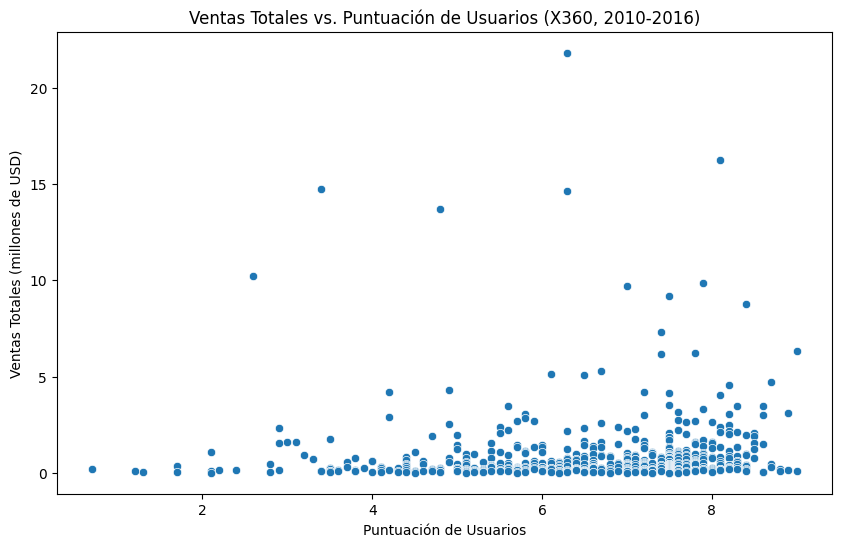

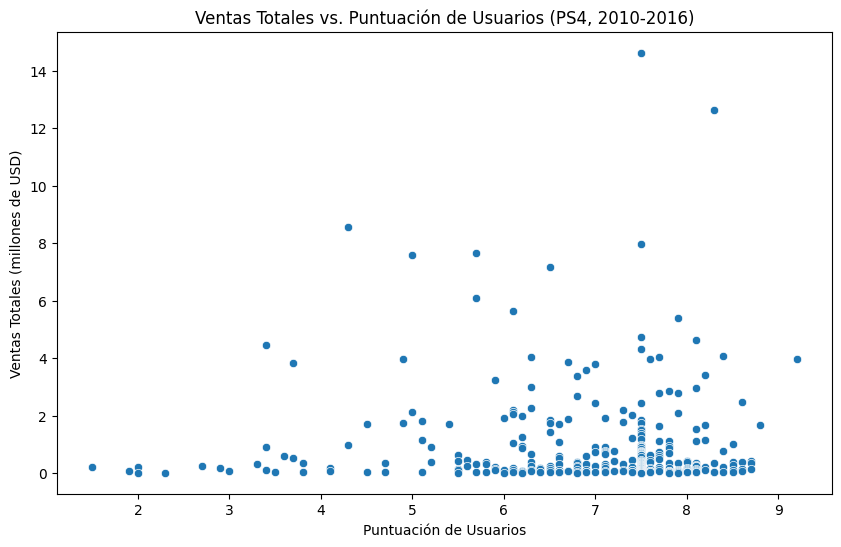

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=x360_data)
plt.title('Ventas Totales vs. Puntuación de Usuarios (X360, 2010-2016)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Ventas Totales vs. Puntuación de Usuarios (PS4, 2010-2016)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones de USD)')
plt.show()

**Calcular la correlación**

Calcular el coeficiente de correlación entre `critic_score` y `total_sales`, y entre `user_score` y `total_sales` para cada plataforma.


In [53]:
correlation, p_value = stats.spearmanr(x360_data['critic_score'], x360_data['total_sales'])
print(f"Correlación de Spearman entre Puntuación de Críticos y Ventas Totales (X360): {correlation:.2f}")
print(f"p-value: {p_value:.2f}")

correlation, p_value = stats.spearmanr(x360_data['user_score'], x360_data['total_sales'])
print(f"Correlación de Spearman entre Puntuación de Usuarios y Ventas Totales (X360): {correlation:.2f}")
print(f"p-value: {p_value:.2f}")

Correlación de Spearman entre Puntuación de Críticos y Ventas Totales (X360): 0.44
p-value: 0.00
Correlación de Spearman entre Puntuación de Usuarios y Ventas Totales (X360): 0.03
p-value: 0.44


In [54]:
correlation, p_value = stats.spearmanr(ps4_data['critic_score'], ps4_data['total_sales'])
print(f"Correlación de Spearman entre Puntuación de Críticos y Ventas Totales (PS4): {correlation:.2f}")
print(f"p-value: {p_value:.2f}")

correlation, p_value = stats.spearmanr(ps4_data['user_score'], ps4_data['total_sales'])
print(f"Correlación de Spearman entre Puntuación de Usuarios y Ventas Totales (PS4): {correlation:.2f}")
print(f"p-value: {p_value:.2f}")

Correlación de Spearman entre Puntuación de Críticos y Ventas Totales (PS4): 0.43
p-value: 0.00
Correlación de Spearman entre Puntuación de Usuarios y Ventas Totales (PS4): -0.07
p-value: 0.16


**Observaciones para X360:**

Los gráficos de dispersión para X360 muestran una tendencia levemente positiva entre la puntuación de los críticos y las ventas totales. Juegos con puntuaciones de críticos más altas tienden a tener ventas ligeramente mayores, aunque la dispersión es considerable. El coeficiente de correlación de 0.44 confirma esta relación positiva débil.

Para la puntuación de los usuarios en X360, el gráfico de dispersión muestra casi ninguna tendencia lineal, y el coeficiente de correlación de 0.03 indica que no hay una correlación lineal significativa entre la puntuación de los usuarios y las ventas totales. Las reseñas de los usuarios no parecen tener un impacto lineal discernible en las ventas en esta plataforma durante este período.

---

**Observaciones para PS4:**

Similar a X360, los gráficos de dispersión para PS4 sugieren una relación positiva débil entre la puntuación de los críticos y las ventas totales. Los puntos tienden a agruparse más en las puntuaciones de críticos más altas con algunas ventas elevadas, lo que indica que las buenas críticas pueden estar asociadas con mejores ventas. El coeficiente de correlación de 0.43 valida esta correlación positiva débil.

Para la puntuación de los usuarios en PS4, el gráfico de dispersión no muestra una clara tendencia lineal. El coeficiente de correlación de -0.07 es muy cercano a cero, lo que sugiere una correlación lineal insignificante entre la puntuación de los usuarios y las ventas totales. Al igual que en X360, las reseñas de los usuarios no parecen tener un impacto lineal fuerte en las ventas en PS4 durante este período.

---

**Conclusiones Generales:**

En ambas plataformas (X360 y PS4) durante el período 2010-2016, existe una correlación positiva débil entre las puntuaciones de los críticos y las ventas totales. Esto sugiere que las críticas profesionales pueden tener una pequeña influencia en el rendimiento de ventas, donde juegos mejor valorados por los críticos tienden a vender un poco más.

Por otro lado, la correlación entre las puntuaciones de los usuarios y las ventas totales es insignificante en ambas plataformas. Esto indica que las reseñas de los usuarios, en este dataset y período, no muestran una relación lineal clara o fuerte con las ventas de los juegos. Es posible que otros factores tengan una influencia más dominante en las ventas que la percepción directa de los usuarios reflejada en sus puntuaciones.


## Ventas del mismo juego en diferentes plataformas
Compara las ventas de los mismos juegos en otras plataformas, basándote en los datos disponibles.

**Identificar juegos multiplataforma**

Filtrar el DataFrame `period_data` para encontrar juegos que aparecen en más de una plataforma.


In [55]:
platform_counts = period_data.groupby('name')['platform'].nunique()
multiplatform_games = platform_counts[platform_counts > 1].index.tolist()

print(f"Número de juegos multiplataforma encontrados: {len(multiplatform_games)}")
print("Primeros 10 juegos multiplataforma:")
print(multiplatform_games[:10])

Número de juegos multiplataforma encontrados: 1038
Primeros 10 juegos multiplataforma:
[" Frozen: Olaf's Quest", '2010 FIFA World Cup South Africa', '2014 FIFA World Cup Brazil', '3rd Super Robot Wars Z Jigoku Hen', '3rd Super Robot Wars Z: Tengoku-Hen', '7 Days to Die', 'AKB1/149: Love Election', 'AKB1/48: Idol to Guam de Koishitara...', 'Abunai: Koi no Sousa Shitsu', 'Accel World: Ginyoku no Kakusei']


**Analizar ventas por juego y plataforma**

Para los juegos identificados, agrupar por nombre del juego y plataforma para ver las ventas totales en cada una.


In [56]:
multiplatform_sales = period_data[period_data['name'].isin(multiplatform_games)]
multiplatform_sales = multiplatform_sales.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
display(multiplatform_sales.head())

,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,2010 FIFA World Cup South Africa,PS3,1.23
3,2010 FIFA World Cup South Africa,PSP,0.46
4,2010 FIFA World Cup South Africa,Wii,0.43


**Comparar ventas**

Analizar las ventas de los mismos juegos en diferentes plataformas para identificar patrones o diferencias significativas.


In [57]:
game_platform_sales = multiplatform_sales.groupby('name').apply(lambda x: x.sort_values(by='total_sales', ascending=False)).reset_index(drop=True)
game_platform_sales.head(10)

/tmp/ipython-input-2664625393.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  game_platform_sales = multiplatform_sales.groupby('name').apply(lambda x: x.sort_values(by='total_sales', ascending=False)).reset_index(drop=True)


,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,2010 FIFA World Cup South Africa,PS3,1.23
3,2010 FIFA World Cup South Africa,X360,0.85
4,2010 FIFA World Cup South Africa,PSP,0.46
5,2010 FIFA World Cup South Africa,Wii,0.43
6,2014 FIFA World Cup Brazil,PS3,0.61
7,2014 FIFA World Cup Brazil,X360,0.43
8,3rd Super Robot Wars Z Jigoku Hen,PS3,0.23
9,3rd Super Robot Wars Z Jigoku Hen,PSV,0.19


Crear visualizaciones (por ejemplo, gráficos de barras o tablas) para mostrar las ventas de juegos multiplataforma en diferentes plataformas.


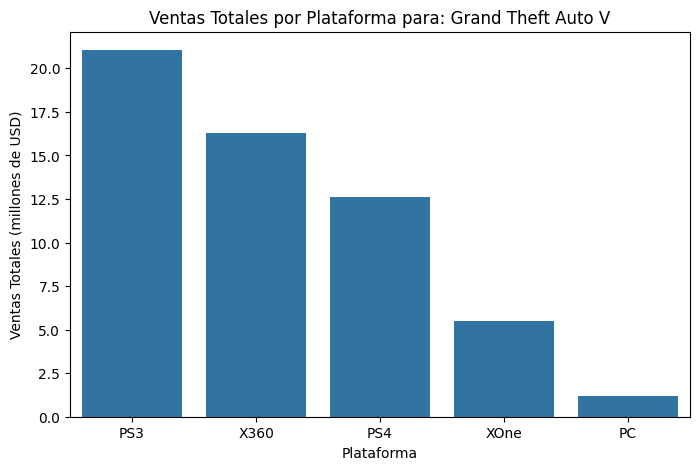

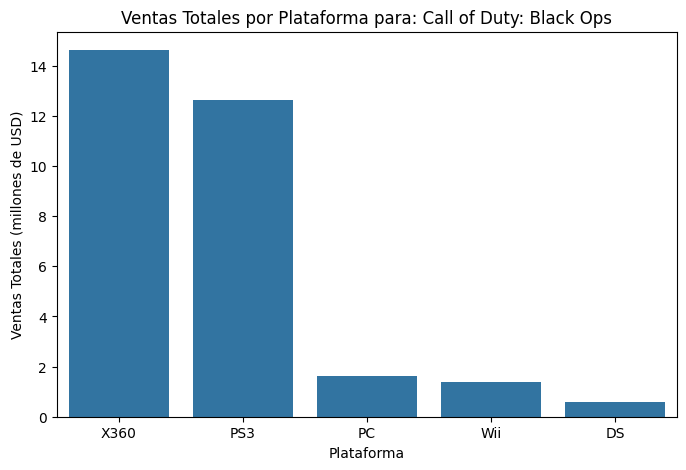

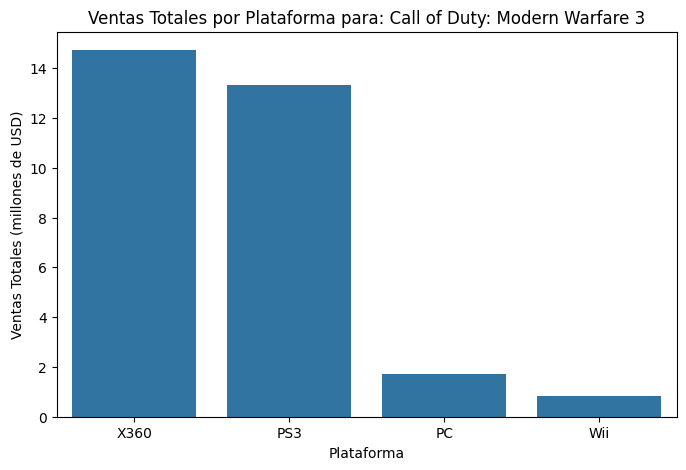

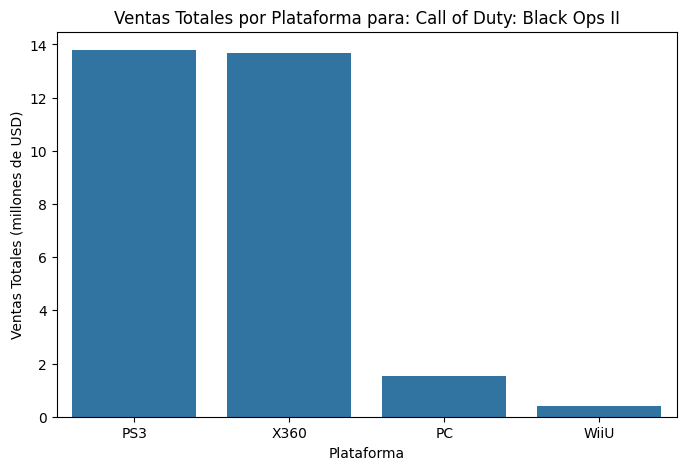

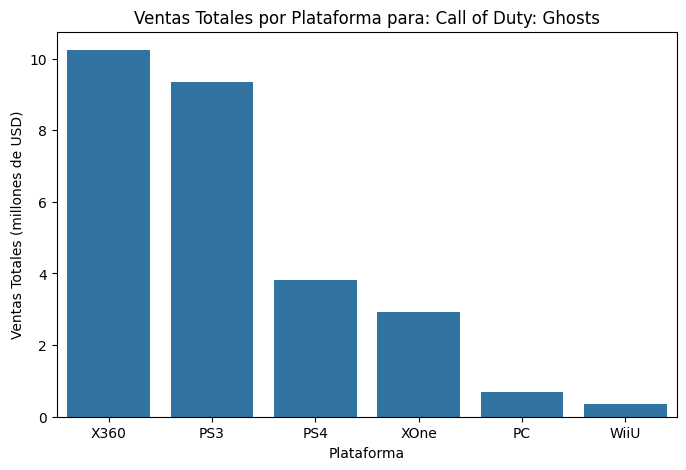

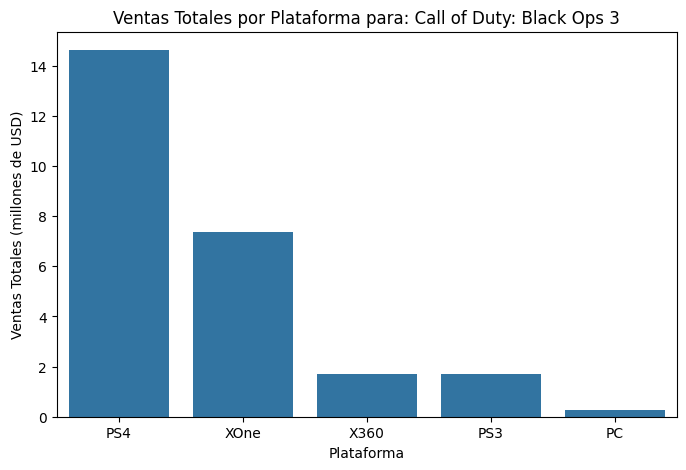

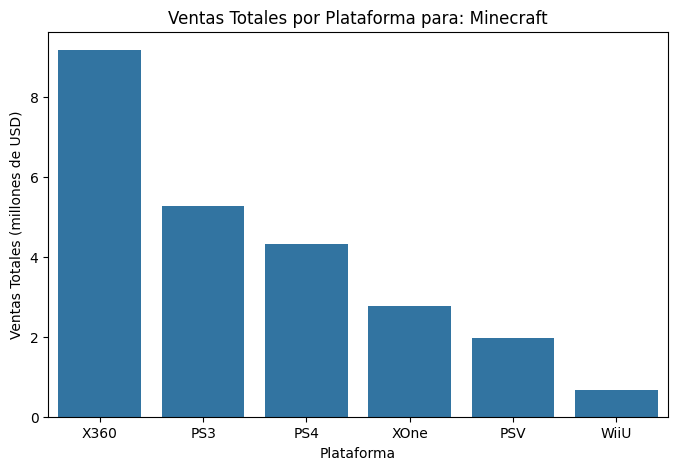

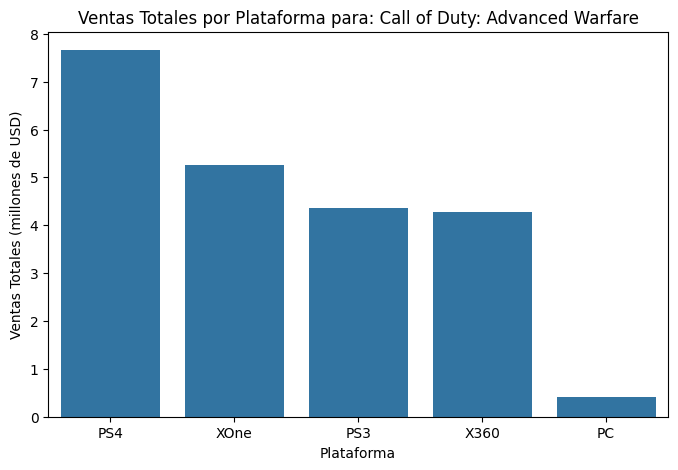

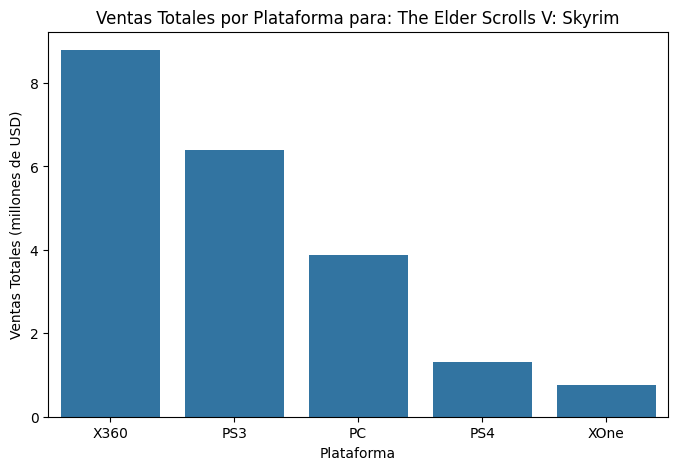

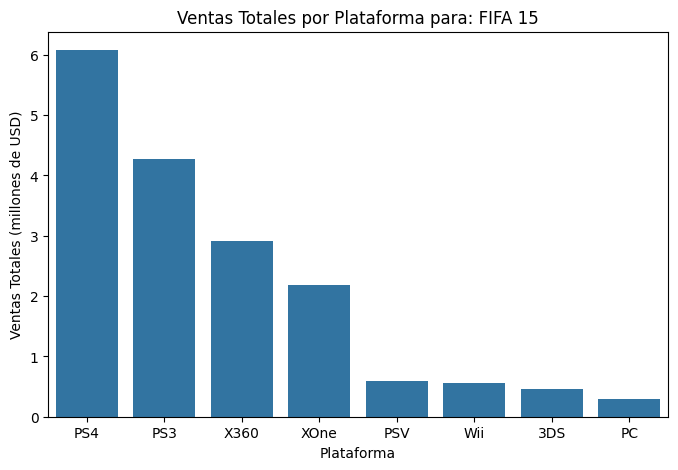

In [58]:
top_multiplatform_games = game_platform_sales.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()

for game in top_multiplatform_games:
    game_data = game_platform_sales[game_platform_sales['name'] == game]
    plt.figure(figsize=(8, 5))
    sns.barplot(x='platform', y='total_sales', data=game_data)
    plt.title(f'Ventas Totales por Plataforma para: {game}')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas Totales (millones de USD)')
    plt.show()

- Se identificaron un total de 1038 juegos multiplataforma en el conjunto de datos.
- Las ventas de juegos multiplataforma varían significativamente entre las diferentes plataformas.
- Ninguna plataforma dominó de forma consistente las ventas de todos los juegos multiplataforma.
- Las plataformas PlayStation (PS3, PS4) y Xbox (X360, XOne) a menudo registraron fuertes ventas de títulos multiplataforma de alto rendimiento, pero la distribución de las ventas varió en función del juego específico.



## Distribución de juegos por género



In [59]:
genre_sales = period_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por género (2010-2016):")
print(genre_sales)

Ventas totales por género (2010-2016):
genre
Action          681.00
Shooter         483.24
Sports          330.69
Role-Playing    316.05
Misc            239.24
Racing          124.68
Platform        120.20
Fighting         81.73
Simulation       72.64
Adventure        61.12
Strategy         36.46
Puzzle           20.89
Name: total_sales, dtype: float64


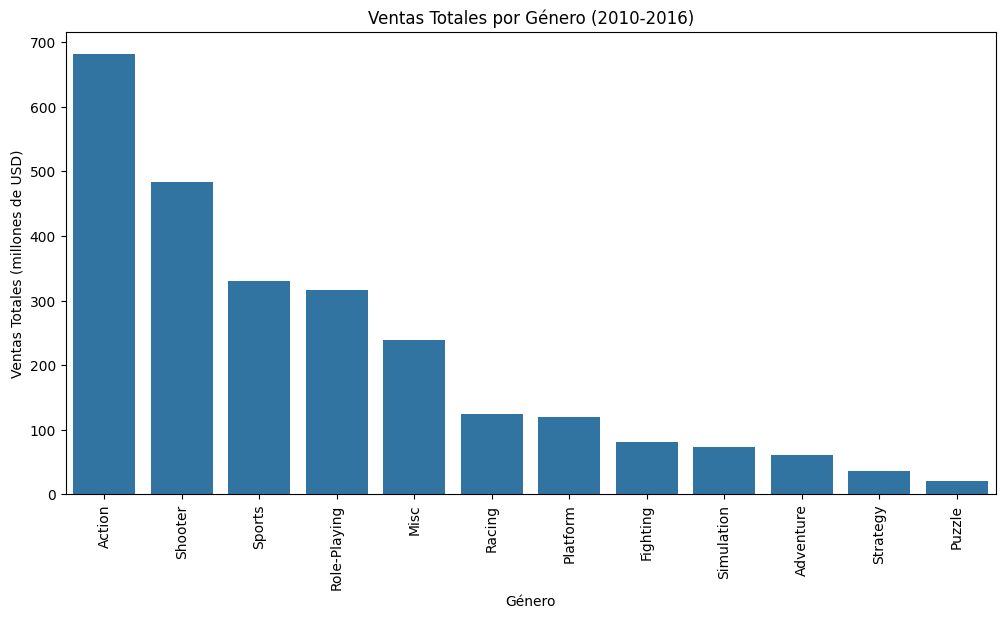

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Ventas Totales por Género (2010-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones de USD)')
plt.xticks(rotation=90)
plt.show()

**Análisis de la Distribución de Juegos por Género y Rentabilidad:**

Basado en las ventas totales por género en el período 2010-2016:

*   **Géneros más rentables:** Los géneros **Action**, **Shooter**, **Sports** y **Role-Playing** son claramente los más rentables, generando las mayores ventas totales en el período analizado. Esto sugiere que los juegos dentro de estas categorías tienen una mayor demanda en el mercado.

*   **Géneros con ventas altas:** Además de los géneros más rentables, **Misc**, **Platform**, **Racing** y **Fighting** también muestran ventas significativas, aunque en menor medida que los líderes. Estos géneros también contribuyen considerablemente a las ventas totales de la industria.

*   **Géneros con ventas bajas:** Géneros como **Adventure**, **Simulation**, **Strategy**, **Puzzle** y **Rhythm** tienen ventas totales considerablemente más bajas en comparación con los géneros principales. Esto podría deberse a un nicho de mercado más pequeño o a una menor popularidad general.

**Generalizaciones sobre géneros con ventas altas y bajas:**

*   **Géneros con ventas altas:** Tienden a ser aquellos que ofrecen experiencias de juego inmersivas, competitivas o con un fuerte enfoque en la acción y la narrativa. La popularidad de los eSports y los juegos multijugador en línea también puede influir en las ventas de géneros como Shooter y Sports.
*   **Géneros con ventas bajas:** A menudo se asocian con experiencias de juego más relajadas, de nicho o que requieren un enfoque más estratégico o mental. Estos géneros pueden atraer a un público específico pero no generan el mismo volumen de ventas masivas que los géneros más populares.

Es importante tener en cuenta que la rentabilidad de un género puede variar con el tiempo y estar influenciada por las tendencias del mercado, la innovación en el diseño de juegos y el lanzamiento de títulos altamente exitosos dentro de cada categoría.

# Crea un perfil de usuario para cada región **(Parte 4)**

## Plataformas principales

### NA SALES

In [61]:
na_sales = period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[0:5]

print("Ventas totales por plataforma (2010-2016):")
print(na_sales)

Ventas totales por plataforma (2010-2016):
platform
X360    340.91
PS3     232.61
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64


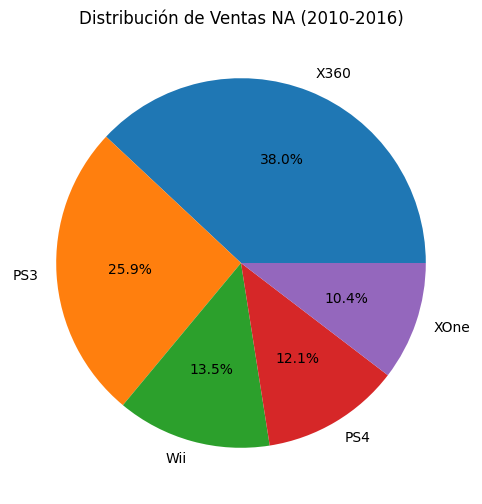

In [62]:
plt.figure(figsize=(10, 6))
plt.pie(na_sales, labels=na_sales.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas NA (2010-2016)')
plt.show()

**América del Norte (NA):**

La plataforma ***X360*** domina significativamente el mercado en América del Norte, con la mayor cuota de ventas.

***PS3*** también tiene una presencia fuerte, seguida por ***Wii***, ***PS4***, y ***XOne***.

Las ventas en NA parecen estar más concentradas en un par de plataformas líderes.

### UE SALES

In [63]:
ue_sales = period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[0:5]

print("Ventas totales por plataforma (2010-2016):")
print(ue_sales)

Ventas totales por plataforma (2010-2016):
platform
PS3     216.68
X360    165.85
PS4     141.09
PC       70.89
Wii      65.91
Name: eu_sales, dtype: float64


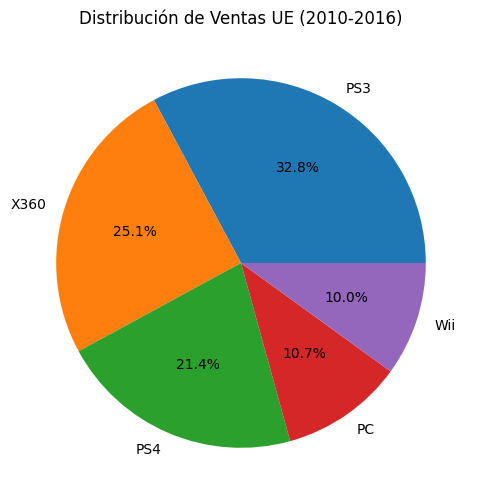

In [64]:
plt.figure(figsize=(10, 6))
plt.pie(ue_sales, labels=ue_sales.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas UE (2010-2016)')
plt.show()

**Europa (UE):**

En Europa, ***PS3*** lidera las ventas, aunque la diferencia con ***X360*** es menor que en NA.

***PS4*** muestra una cuota de mercado considerable, superando a ***PC*** y ***Wii***.

El mercado europeo parece tener una distribución de ventas un poco más equilibrada entre las plataformas principales en comparación con NA.

### JP

In [65]:
jp_sales = period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[0:5]

print("Ventas totales por plataforma (2010-2016):")
print(jp_sales)

Ventas totales por plataforma (2010-2016):
platform
3DS    100.67
PS3     60.04
PSP     42.20
DS      27.90
PSV     21.91
Name: jp_sales, dtype: float64


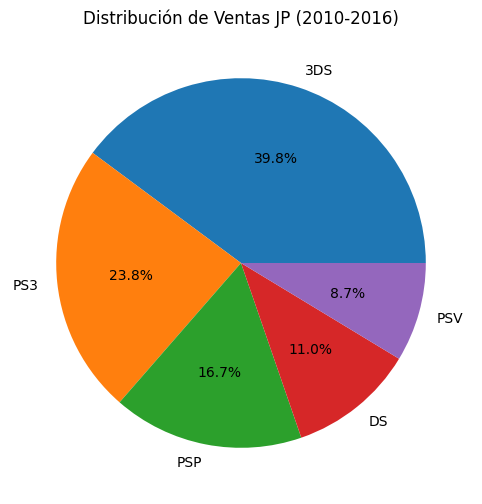

In [66]:
plt.figure(figsize=(10, 6))
plt.pie(jp_sales, labels=jp_sales.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas JP (2010-2016)')
plt.show()

**Japón (JP):**

El mercado japonés es notablemente diferente, con ***3DS*** a la cabeza por un amplio margen.

Las plataformas de Sony, ***PS3*** y ***PSP***, también tienen una presencia significativa, seguidas por ***DS*** y ***PSV***.
Las plataformas de Nintendo y Sony dominan el mercado japonés, mientras que las plataformas de Microsoft (***X360, XOne***) no aparecen entre las cinco principales en esta región, lo que indica una preferencia cultural o histórica por las consolas japonesas.

## Resumen y observaciones

Las cuotas de mercado de las plataformas varían considerablemente según la región. América del Norte tiene una fuerte inclinación hacia Xbox 360, Europa muestra una competencia más reñida entre PlayStation 3 y Xbox 360 con una presencia creciente de PS4, y Japón está claramente dominado por las consolas portátiles y de sobremesa de Nintendo y Sony.

## Generos principales

### Región NA

In [67]:
na_genres = period_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[0:5]

print("Ventas totales por género (2010-2016):")
print(na_genres)

Ventas totales por género (2010-2016):
genre
Action          294.06
Shooter         239.14
Sports          158.16
Misc            127.16
Role-Playing    112.41
Name: na_sales, dtype: float64


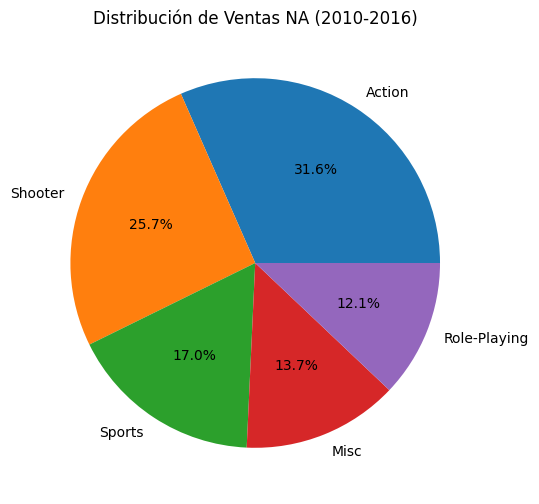

In [68]:
plt.figure(figsize=(10, 6))
plt.pie(na_genres, labels=na_genres.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas NA (2010-2016)')
plt.show()

**América del Norte (NA):**

Los géneros **`Action`** y **`Shooter`** dominan claramente el mercado de América del Norte, representando una porción significativa de las ventas.

**`Sports`**, **`Misc`**, y **`Role-Playing`** también son populares, pero con cuotas de mercado menores.

Esto sugiere una preferencia por juegos de ritmo rápido, competitivos y de acción en esta región.

### Región EU

In [69]:
eu_genres = period_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[0:5]

print("Ventas totales por género (2010-2016):")
print(eu_genres)

Ventas totales por género (2010-2016):
genre
Action          236.60
Shooter         172.81
Sports          117.51
Role-Playing     75.65
Misc             66.92
Name: eu_sales, dtype: float64


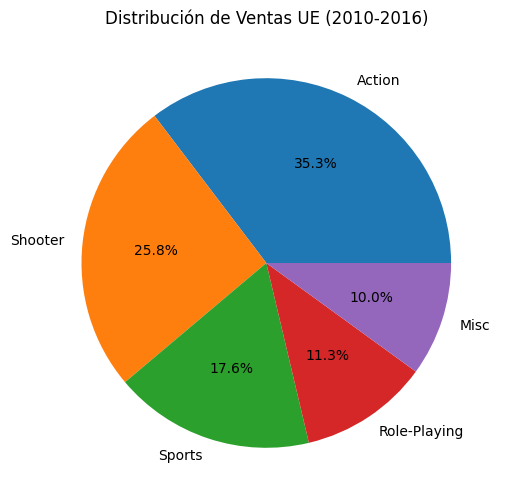

In [70]:
plt.figure(figsize=(10,6))
plt.pie(eu_genres, labels=eu_genres.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas UE (2010-2016)')
plt.show()

**Europa (UE):**

Similar a NA, los géneros **`Action`** y **`Shooter`** son los más populares en Europa, con altas ventas.

**`Sports`** también tiene una fuerte presencia, seguida por **`Role-Playing`** y **`Misc`**.

La distribución de géneros en Europa es bastante similar a la de América del Norte, aunque las proporciones pueden variar ligeramente.

### Región JP

In [71]:
jp_genres = period_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[0:5]

print("Ventas totales por género (2010-2016):")
print(jp_genres)

Ventas totales por género (2010-2016):
genre
Role-Playing    103.70
Action           72.84
Misc             24.30
Platform         15.81
Adventure        15.69
Name: jp_sales, dtype: float64


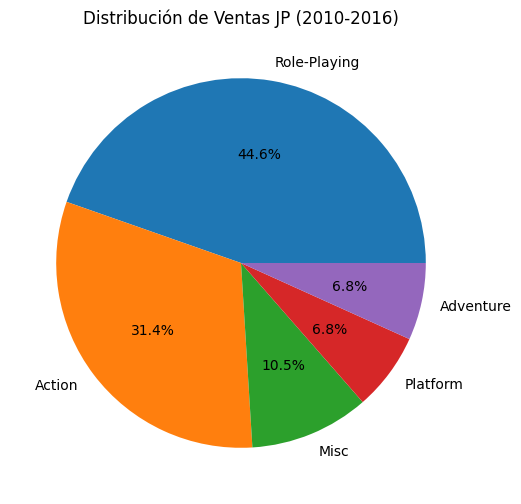

In [72]:
plt.figure(figsize=(10,6))
plt.pie(jp_genres, labels=jp_genres.index, autopct='%1.1f%%')
plt.title('Distribución de Ventas JP (2010-2016)')
plt.show()

**Japón (JP):**

El mercado japonés muestra una preferencia marcadamente diferente. El género **`Role-Playing`** es el líder indiscutible, con una cuota de mercado mucho mayor que en NA o UE.

**`Action`** también es popular, pero con ventas considerablemente menores en comparación con **`Role-Playing`**.

Otros géneros relevantes incluyen **`Misc`**, **`Platform`**, y **`Adventure`**.

Los géneros **`Shooter`** y **`Sports`**, que son muy populares en NA y UE, tienen una presencia mucho menor en Japón, ya que no se encuentran dentro del top 5.

## Resumen y Observaciones

Las variaciones en las cuotas de mercado por género entre regiones pueden atribuirse a una combinación de factores culturales, históricos y demográficos:

- **Diferencias Culturales**: Las preferencias de juego a menudo reflejan intereses y valores culturales. En Japón, por ejemplo, los juegos de rol tienen una larga historia y son profundamente arraigados en la cultura del juego.
- **Popularidad de Franquicias Específicas**: Ciertas franquicias de juegos son más populares en algunas regiones que en otras, lo que puede influir en la popularidad de los géneros asociados. Por ejemplo, la fuerte presencia de juegos de rol japoneses en el mercado nipón impulsa significativamente este género.
- **Adopción de Plataformas**: Como apareció en el análisis de plataformas, la popularidad de ciertas consolas varía por región. Dado que algunos géneros tienden a ser más fuertes en ciertas plataformas, esto puede explicar en parte las diferencias en las cuotas de mercado por género. Por ejemplo, los juegos de rol son tradicionalmente muy populares en las consolas de Sony y Nintendo, que tienen una fuerte presencia en Japón.
- **Tendencias del Mercado Local**: Las tendencias y la influencia de los medios locales también juegan un papel. Lo que es popular en los medios o en las comunidades de jugadores de una región puede no serlo en otra.

En conclusión, si bien los géneros de **`Acción`** y **`Shooter`** son universalmente populares, las preferencias específicas, especialmente en Japón con su inclinación hacia los juegos de rol, demuestran la diversidad del mercado global de videojuegos y la importancia de adaptar las estrategias a cada región.

## Influencia de las clasificaciones de ESRB en las ventas por región

### Región NA

In [73]:
period_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5358 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5358 non-null   object 
 1   platform         5358 non-null   object 
 2   year_of_release  5358 non-null   int64  
 3   genre            5358 non-null   object 
 4   na_sales         5358 non-null   float64
 5   eu_sales         5358 non-null   float64
 6   jp_sales         5358 non-null   float64
 7   other_sales      5358 non-null   float64
 8   critic_score     5358 non-null   float64
 9   user_score       5358 non-null   float64
 10  rating           5358 non-null   object 
 11  total_sales      5358 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 544.2+ KB


<Axes: xlabel='na_sales', ylabel='total_sales'>

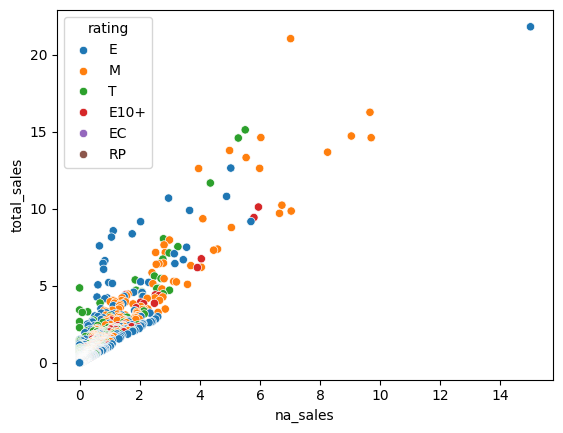

In [74]:
sns.scatterplot(data=period_data, x='na_sales', y='total_sales', hue='rating')